![Python_logo](https://www.python.org/static/community_logos/python-logo-master-v3-TM.png)


   # **Cortex Game: Round1--Amount**

> Before playing the game, you need to connect to SASPy first.
>
>> If it is your first time, please follow the 4 steps mentioned below!

***
## **Connect to SASPy**

**0- Connect to your Google Drive folder**

In [1]:
my_folder = "/content/drive/MyDrive/COLAB-SAS"

from google.colab import drive
drive.mount('/content/drive')

# Change the following code to set your Drive folder
import os
os.chdir(my_folder)
!pwd

Mounted at /content/drive
/content/drive/MyDrive/COLAB-SAS


**1- Make sure that your Python version is 3.3 or higher as well as your Java version is 1.8.0_162 or higher**

In [2]:
!echo "Python is at" $(which python)
!python --version

Python is at /usr/local/bin/python
Python 3.8.15


In [3]:
!echo "Java is at" $(which java)
!/usr/bin/java -version

Java is at /usr/bin/java
openjdk version "11.0.17" 2022-10-18
OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)


**2- Install SASPy**

In [4]:
!pip install saspy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 24.0 MB/s 
  Created wheel for saspy: filename=saspy-4.4.1-py3-none-any.whl size=9937304 sha256=a4b8a2a5ab0ab92030c04cad837c4e71e321dbff9a0ededd4f636724f94ee158
  Stored in directory: /root/.cache/pip/wheels/0a/f6/ab/f7173c8a824856c66f6fd50194bb8fd3ef93fb4f1824be8d0c
Successfully built saspy


**3- Create the configuration file "sascfg_personal.py"**
Please, check that your Home Region is correct, you can check it at [ODA-SAS](https://welcome.oda.sas.com/home)

In [ ]:
%%writefile sascfg_personal.py
SAS_config_names=['oda']
oda = {'java' : '/usr/bin/java',
#US Home Region 1
#'iomhost' : ['odaws01-usw2.oda.sas.com','odaws02-usw2.oda.sas.com','odaws03-usw2.oda.sas.com','odaws04-usw2.oda.sas.com'],
#US Home Region 2
'iomhost' : ['odaws01-usw2-2.oda.sas.com','odaws02-usw2-2.oda.sas.com'],
#European Home Region 1
#'iomhost' : ['odaws01-euw1.oda.sas.com','odaws02-euw1.oda.sas.com'],
#Asia Pacific Home Region 1
#'iomhost' : ['odaws01-apse1.oda.sas.com','odaws02-apse1.oda.sas.com'],
#Asia Pacific Home Region 2
#'iomhost' : ['odaws01-apse1-2.oda.sas.com','odaws02-apse1-2.oda.sas.com'],
'iomport' : 8591,
'authkey' : 'oda',
'encoding' : 'utf-8'
}

Overwriting sascfg_personal.py


**4- Create your .authinfo**

If there is no .authinfo file, you can create this

In [ ]:
%%writefile .authinfo
oda a00827219@tec.mx USR Petalavada.com0 PSW

Overwriting .authinfo


Copy this file to home

In [ ]:
!cp .authinfo ~/.authinfo

**5- Establish Connection (Need to do this step each time you use SASPy)**

In [5]:
import saspy
sas_session = saspy.SASsession(cfgfile="/content/drive/MyDrive/COLAB-SAS/sascfg_personal.py")
sas_session

Using SAS Config named: oda
Error trying to read authinfo file:/root/.authinfo
[Errno 2] No such file or directory: '/root/.authinfo'
Did not find key oda in authinfo file:/root/.authinfo

Please enter the OMR user id: u62400011
Please enter the password for OMR user : ··········
SAS Connection established. Subprocess id is 368



Access Method         = IOM
SAS Config name       = oda
SAS Config file       = /content/drive/MyDrive/COLAB-SAS/sascfg_personal.py
WORK Path             = /saswork/SAS_work933F0000AE08_odaws01-usw2-2.oda.sas.com/SAS_work13EF0000AE08_odaws01-usw2-2.oda.sas.com/
SAS Version           = 9.04.01M6P11072018
SASPy Version         = 4.4.1
Teach me SAS          = False
Batch                 = False
Results               = Pandas
SAS Session Encoding  = utf-8
Python Encoding value = utf-8
SAS process Pid value = 44552


***
## Connect to Cortex Data Sets

Load Cortex datasets from SAS Studio

In [6]:
ps = sas_session.submit("""
    libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';
    """)
print(ps["LOG"])


5                                                          The SAS System                      Friday, December  2, 2022 03:27:00 PM

24         ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
24       ! ods graphics on / outputfmt=png;
25         
26         
27             libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';
28         
29         
30         
31         ods html5 (id=saspy_internal) close;ods listing;
32         

6                                                          The SAS System                      Friday, December  2, 2022 03:27:00 PM

33         


For local Jupyter

In [ ]:
#%%SAS sas_session
#libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';

## Transform cloud SAS dataset to Python dataframe (pandas)


> **For reference**:

> 1. [Pandas library](https://pandas.pydata.org/docs/user_guide/index.html)

> 2. [sklearn.model_selection for data partition](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)


In [7]:
import pandas as pd

data1 = sas_session.sasdata2dataframe(
table='hist',
libref='cortex'
)

data2 = sas_session.sasdata2dataframe(
table='target_rd1',
libref='cortex'
)

## Merge the Data

In [8]:
data_merge = pd.merge(data1, data2, on=["ID"],how="right")
data_merge.sample(5)

#data_merge.head()


ID LastName FirstName  Woman   Age   Salary  \
770212  2770213.0  VANHOOF       AMY    1.0  44.0  54200.0   
647201  2647202.0  PALACIO  MARGARET    1.0  36.0   1000.0   
363502  2363503.0     CARR       EVA    1.0  31.0  20000.0   
769134  2769135.0     SHIN   WILLIAM    0.0  22.0  28300.0   
273874  2273875.0    BRUCE      KYLA    1.0  28.0  44600.0   

                   Education      City  SeniorList  NbActivities  ...  \
770212           High School      City         0.0           0.0  ...   
647201           High School  Suburban        10.0           0.0  ...   
363502  University / College     Rural         4.0           0.0  ...   
769134  University / College      City         4.0           0.0  ...   
273874  University / College     Rural         9.0           2.0  ...   

        Recency  Frequency  Seniority  TotalGift  MinGift  MaxGift  \
770212      NaN        NaN        NaN        NaN      NaN      NaN   
647201      4.0        2.0        7.0       30.0     10.0     20.0   
363502      1.0        2.0        2.0       50.0     20.0     30.0   
769134      NaN        NaN        NaN        NaN      NaN      NaN   
273874      1.0        3.0        9.0       55.0     10.0     25.0   

        GaveLastYear  AmtLastYear  GaveThisYear  AmtThisYear  
770212           0.0          0.0           0.0          0.0  
647201           0.0          0.0           0.0          0.0  
363502           0.0          0.0           0.0          0.0  
769134           0.0          0.0           0.0          0.0  
273874           0.0          0.0           1.0         20.0  

[5 rows x 21 columns]

## Treat Missing Values

> Please be aware that deleting all missing values can induce a selection bias. 
Some missing values are very informative. For example, when MinGift is missing, it means that the donor never gave in the past 10 years (leading to but excluding last year). Instead of deleting this information, replacing it by 0 is more appropriate!

> A good understanding of the business case and the data can help you come up with more appropriate strategies to deal with missing values.


In [10]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 21 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   ID            1000000 non-null  float64
 1   LastName      999977 non-null   object 
 2   FirstName     999996 non-null   object 
 3   Woman         1000000 non-null  float64
 4   Age           1000000 non-null  float64
 5   Salary        1000000 non-null  float64
 6   Education     1000000 non-null  object 
 7   City          1000000 non-null  object 
 8   SeniorList    1000000 non-null  float64
 9   NbActivities  1000000 non-null  float64
 10  Referrals     1000000 non-null  float64
 11  Recency       336334 non-null   float64
 12  Frequency     336334 non-null   float64
 13  Seniority     336334 non-null   float64
 14  TotalGift     336334 non-null   float64
 15  MinGift       336334 non-null   float64
 16  MaxGift       336334 non-null   float64
 17  GaveLastYear  1000000 non-nu

In [ ]:
data_merge.describe()

ID           Woman             Age          Salary  \
count  1.000000e+06  1000000.000000  1000000.000000  1000000.000000   
mean   2.500000e+06        0.516936       46.366170    65531.654000   
std    2.886753e+05        0.499713       18.945324    61051.122343   
min    2.000001e+06        0.000000       16.000000        0.000000   
25%    2.250001e+06        0.000000       30.000000    20700.000000   
50%    2.500000e+06        1.000000       46.000000    44000.000000   
75%    2.750000e+06        1.000000       61.000000    91200.000000   
max    3.000000e+06        1.000000       90.000000   250000.000000   

           SeniorList    NbActivities       Referrals        Recency  \
count  1000000.000000  1000000.000000  1000000.000000  336334.000000   
mean         4.582967        0.561413        0.560556       3.039636   
std          3.325844        0.996803        1.054027       2.120722   
min          0.000000        0.000000        0.000000       1.000000   
25%          2.000000        0.000000        0.000000       1.000000   
50%          4.000000        0.000000        0.000000       2.000000   
75%          7.000000        1.000000        1.000000       4.000000   
max         10.000000       10.000000       16.000000      10.000000   

           Frequency      Seniority      TotalGift        MinGift  \
count  336334.000000  336334.000000  336334.000000  336334.000000   
mean        1.666882       4.474148     104.454055      43.130251   
std         1.052090       2.588119     303.760477     150.249476   
min         1.000000       1.000000      10.000000      10.000000   
25%         1.000000       2.000000      20.000000      15.000000   
50%         1.000000       4.000000      40.000000      20.000000   
75%         2.000000       6.000000      90.000000      30.000000   
max        10.000000      10.000000   15150.000000   10000.000000   

             MaxGift    GaveLastYear     AmtLastYear    GaveThisYear  \
count  336334.000000  1000000.000000  1000000.000000  1000000.000000   
mean       85.897932        0.122101        7.673015        0.122232   
std       283.581066        0.327403       82.224854        0.327554   
min        10.000000        0.000000        0.000000        0.000000   
25%        20.000000        0.000000        0.000000        0.000000   
50%        30.000000        0.000000        0.000000        0.000000   
75%        75.000000        0.000000        0.000000        0.000000   
max     10000.000000        1.000000    10000.000000        1.000000   

          AmtThisYear  
count  1000000.000000  
mean         7.741080  
std         83.110552  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          0.000000  
max      10000.000000

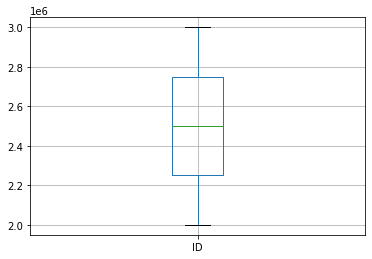

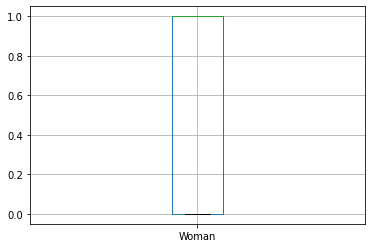

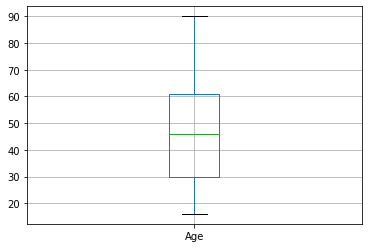

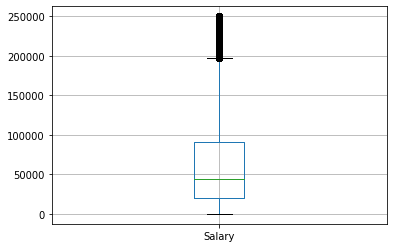

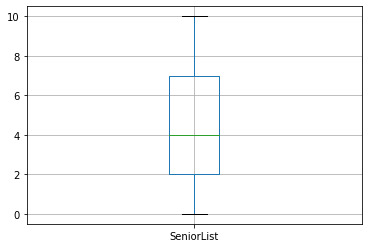

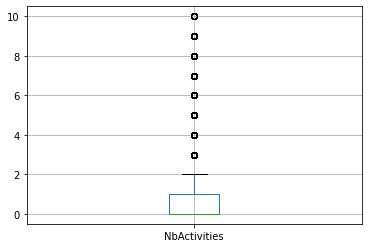

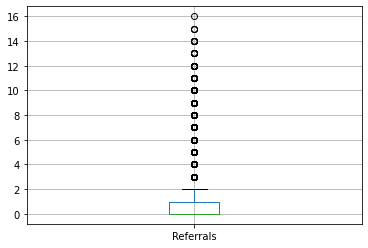

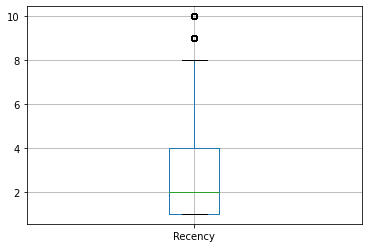

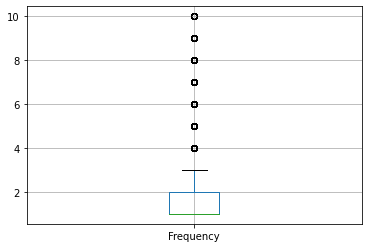

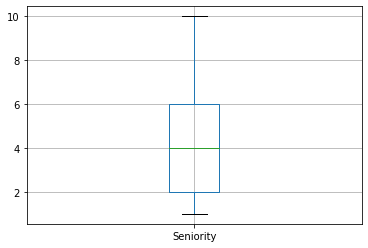

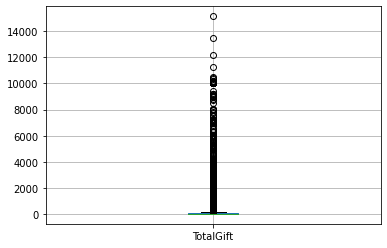

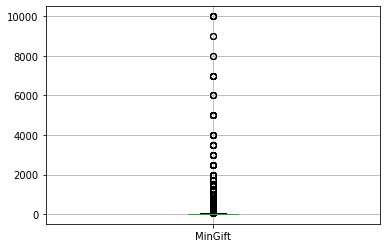

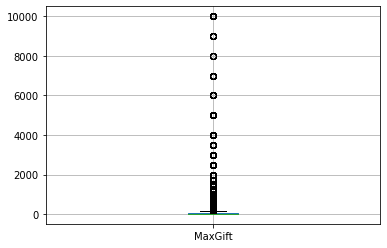

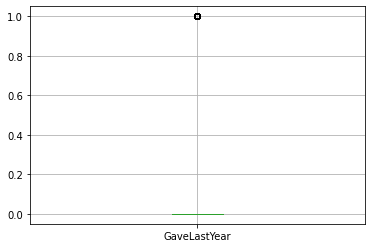

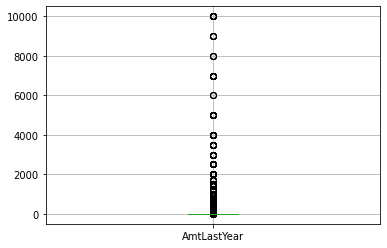

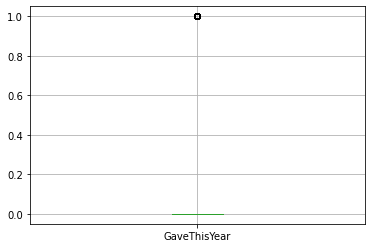

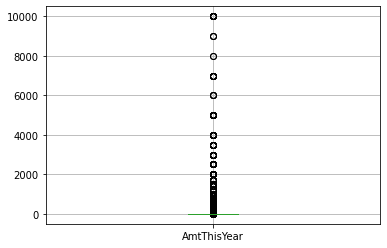

In [ ]:
import matplotlib.pyplot as plt

df1=data_merge.select_dtypes(exclude=['object'])

for column in df1:
    plt.figure()
    df1.boxplot([column])

In [9]:
# In this case, we are replacing MinGift by 0.
# You can do the same for what you think is reasonable for dealing with the other variables.

data_merge[['MinGift']] = data_merge[['MinGift']].fillna(value=0)
data_merge[['MaxGift']] = data_merge[['MaxGift']].fillna(value=0)  
data_merge[['TotalGift']] = data_merge[['TotalGift']].fillna(value=0) 

data_merge.sample(3)

ID LastName FirstName  Woman   Age    Salary    Education  \
358848  2358849.0      ROY    CONNIE    1.0  32.0  140700.0  High School   
586290  2586291.0    BROWN   JEFFERY    0.0  64.0   18300.0  High School   
128384  2128385.0   BELLAN    GEORGE    0.0  57.0   29200.0  High School   

            City  SeniorList  NbActivities  ...  Recency  Frequency  \
358848  Suburban         0.0           0.0  ...      NaN        NaN   
586290  Suburban         8.0           1.0  ...      NaN        NaN   
128384      City         3.0           1.0  ...      NaN        NaN   

        Seniority  TotalGift  MinGift  MaxGift  GaveLastYear  AmtLastYear  \
358848        NaN        0.0      0.0      0.0           0.0          0.0   
586290        NaN        0.0      0.0      0.0           0.0          0.0   
128384        NaN        0.0      0.0      0.0           1.0        250.0   

        GaveThisYear  AmtThisYear  
358848           0.0          0.0  
586290           0.0          0.0  
128384           1.0         40.0  

[3 rows x 21 columns]

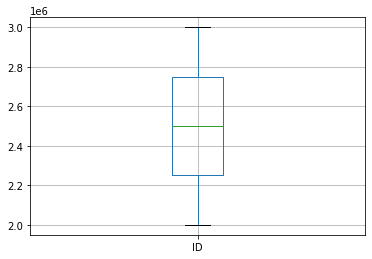

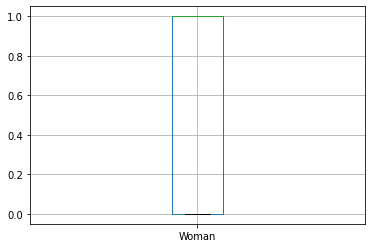

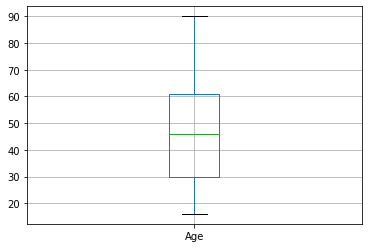

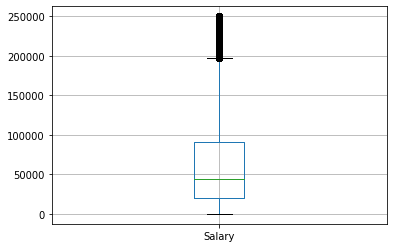

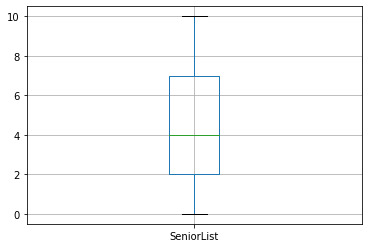

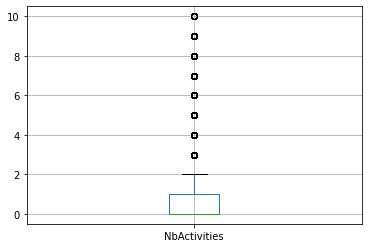

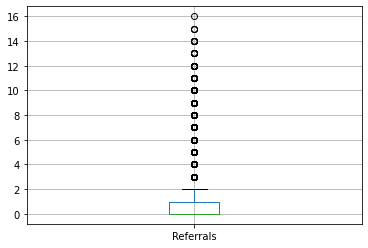

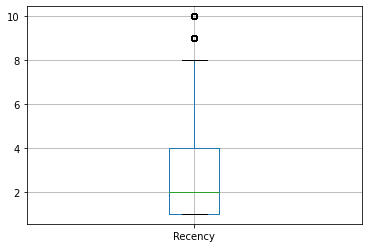

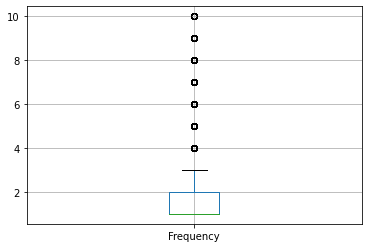

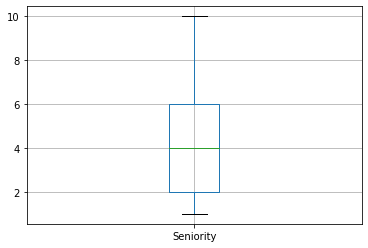

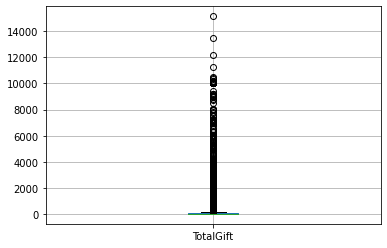

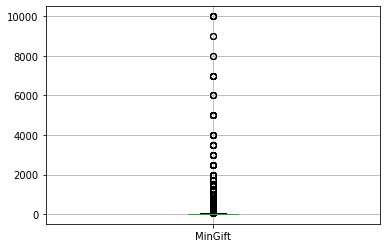

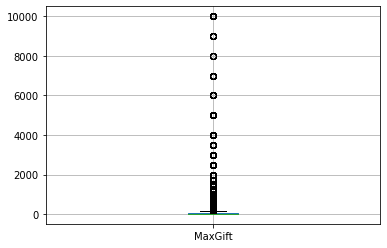

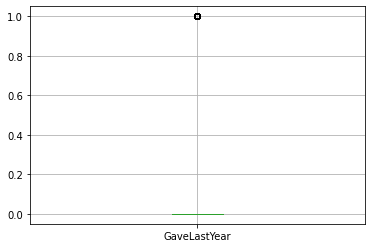

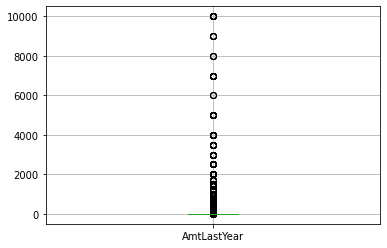

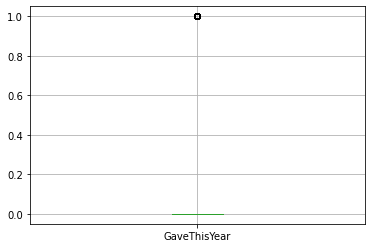

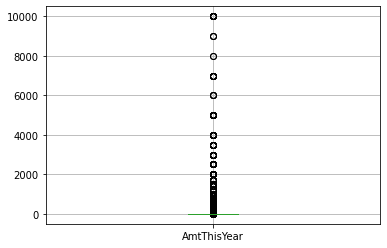

In [ ]:
for column in df1:
    plt.figure()
    df1.boxplot([column])

In [12]:
data_merge.describe()

ID           Woman             Age          Salary  \
count  1.000000e+06  1000000.000000  1000000.000000  1000000.000000   
mean   2.500000e+06        0.516936       46.366170    65531.654000   
std    2.886753e+05        0.499713       18.945324    61051.122343   
min    2.000001e+06        0.000000       16.000000        0.000000   
25%    2.250001e+06        0.000000       30.000000    20700.000000   
50%    2.500000e+06        1.000000       46.000000    44000.000000   
75%    2.750000e+06        1.000000       61.000000    91200.000000   
max    3.000000e+06        1.000000       90.000000   250000.000000   

           SeniorList    NbActivities       Referrals        Recency  \
count  1000000.000000  1000000.000000  1000000.000000  336334.000000   
mean         4.582967        0.561413        0.560556       3.039636   
std          3.325844        0.996803        1.054027       2.120722   
min          0.000000        0.000000        0.000000       1.000000   
25%          2.000000        0.000000        0.000000       1.000000   
50%          4.000000        0.000000        0.000000       2.000000   
75%          7.000000        1.000000        1.000000       4.000000   
max         10.000000       10.000000       16.000000      10.000000   

           Frequency      Seniority      TotalGift         MinGift  \
count  336334.000000  336334.000000  1000000.00000  1000000.000000   
mean        1.666882       4.474148       35.13145       14.506170   
std         1.052090       2.588119      182.94542       89.486978   
min         1.000000       1.000000        0.00000        0.000000   
25%         1.000000       2.000000        0.00000        0.000000   
50%         1.000000       4.000000        0.00000        0.000000   
75%         2.000000       6.000000       20.00000       15.000000   
max        10.000000      10.000000    15150.00000    10000.000000   

              MaxGift    GaveLastYear     AmtLastYear    GaveThisYear  \
count  1000000.000000  1000000.000000  1000000.000000  1000000.000000   
mean        28.890395        0.122101        7.673015        0.122232   
std        169.393921        0.327403       82.224854        0.327554   
min          0.000000        0.000000        0.000000        0.000000   
25%          0.000000        0.000000        0.000000        0.000000   
50%          0.000000        0.000000        0.000000        0.000000   
75%         20.000000        0.000000        0.000000        0.000000   
max      10000.000000        1.000000    10000.000000        1.000000   

          AmtThisYear  
count  1000000.000000  
mean         7.741080  
std         83.110552  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          0.000000  
max      10000.000000

In [13]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 21 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   ID            1000000 non-null  float64
 1   LastName      999977 non-null   object 
 2   FirstName     999996 non-null   object 
 3   Woman         1000000 non-null  float64
 4   Age           1000000 non-null  float64
 5   Salary        1000000 non-null  float64
 6   Education     1000000 non-null  object 
 7   City          1000000 non-null  object 
 8   SeniorList    1000000 non-null  float64
 9   NbActivities  1000000 non-null  float64
 10  Referrals     1000000 non-null  float64
 11  Recency       336334 non-null   float64
 12  Frequency     336334 non-null   float64
 13  Seniority     336334 non-null   float64
 14  TotalGift     1000000 non-null  float64
 15  MinGift       1000000 non-null  float64
 16  MaxGift       1000000 non-null  float64
 17  GaveLastYear  1000000 non-nu

In [ ]:
data_merge

ID  LastName FirstName  Woman   Age    Salary  \
0       2000001.0    ROMMES    RODNEY    0.0  25.0  107200.0   
1       2000002.0   RAMIREZ    SHARON    1.0  38.0   15800.0   
2       2000003.0    TSOSIE     KAREN    1.0  37.0   57400.0   
3       2000004.0       LEE      MARY    1.0  78.0   23700.0   
4       2000005.0  HUMPHRES     ANGIE    1.0  34.0   71900.0   
...           ...       ...       ...    ...   ...       ...   
999995  2999996.0  SCHUBERT   FRANCES    1.0  29.0   15100.0   
999996  2999997.0     LUGGE      MARY    1.0  22.0    7000.0   
999997  2999998.0       ROY  REGINALD    0.0  17.0    1000.0   
999998  2999999.0   LIBERTI    PAMELA    1.0  32.0   43900.0   
999999  3000000.0      BELL     SYBIL    1.0  50.0   52400.0   

                   Education      City  SeniorList  NbActivities  ...  \
0       University / College      City         2.0           0.0  ...   
1                High School     Rural         4.0           1.0  ...   
2       University / College     Rural         5.0           0.0  ...   
3                High School     Rural         3.0           0.0  ...   
4       University / College     Rural         8.0           0.0  ...   
...                      ...       ...         ...           ...  ...   
999995           High School  Suburban         8.0           3.0  ...   
999996           High School  Suburban        10.0           0.0  ...   
999997           High School      City        10.0           1.0  ...   
999998  University / College     Rural         0.0           0.0  ...   
999999  University / College  Suburban         4.0           0.0  ...   

        Recency  Frequency  Seniority  TotalGift  MinGift  MaxGift  \
0           1.0        2.0        2.0     1010.0     10.0   1000.0   
1           NaN        NaN        NaN        0.0      0.0      0.0   
2           NaN        NaN        NaN        0.0      0.0      0.0   
3           NaN        NaN        NaN        0.0      0.0      0.0   
4           NaN        NaN        NaN        0.0      0.0      0.0   
...         ...        ...        ...        ...      ...      ...   
999995      5.0        1.0        5.0       20.0     20.0     20.0   
999996      NaN        NaN        NaN        0.0      0.0      0.0   
999997      1.0        1.0        1.0       20.0     20.0     20.0   
999998      NaN        NaN        NaN        0.0      0.0      0.0   
999999      NaN        NaN        NaN        0.0      0.0      0.0   

        GaveLastYear  AmtLastYear  GaveThisYear  AmtThisYear  
0                0.0          0.0           0.0          0.0  
1                0.0          0.0           0.0          0.0  
2                0.0          0.0           0.0          0.0  
3                0.0          0.0           0.0          0.0  
4                0.0          0.0           0.0          0.0  
...              ...          ...           ...          ...  
999995           0.0          0.0           0.0          0.0  
999996           0.0          0.0           0.0          0.0  
999997           0.0          0.0           0.0          0.0  
999998           0.0          0.0           0.0          0.0  
999999           0.0          0.0           0.0          0.0  

[1000000 rows x 21 columns]

In [10]:
data_merge[['Recency']] = data_merge[['Recency']].fillna(value=0) 
data_merge[['Frequency']] = data_merge[['Frequency']].fillna(value=0) 
data_merge[['Seniority']] = data_merge[['Seniority']].fillna(value=0) 

In [11]:
data_merge = data_merge.drop(['LastName', 'FirstName'], axis=1)

In [12]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 19 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   ID            1000000 non-null  float64
 1   Woman         1000000 non-null  float64
 2   Age           1000000 non-null  float64
 3   Salary        1000000 non-null  float64
 4   Education     1000000 non-null  object 
 5   City          1000000 non-null  object 
 6   SeniorList    1000000 non-null  float64
 7   NbActivities  1000000 non-null  float64
 8   Referrals     1000000 non-null  float64
 9   Recency       1000000 non-null  float64
 10  Frequency     1000000 non-null  float64
 11  Seniority     1000000 non-null  float64
 12  TotalGift     1000000 non-null  float64
 13  MinGift       1000000 non-null  float64
 14  MaxGift       1000000 non-null  float64
 15  GaveLastYear  1000000 non-null  float64
 16  AmtLastYear   1000000 non-null  float64
 17  GaveThisYear  1000000 non-nu

In [13]:
print(data_merge["Education"].unique())
print(data_merge["City"].unique())
print(data_merge["SeniorList"].unique())
print(data_merge["NbActivities"].unique())
print(data_merge["Referrals"].unique())
print(data_merge["Recency"].unique())

['University / College' 'High School' 'Elementary']
['City' 'Rural' 'Suburban' 'Downtown']
[ 2.  4.  5.  3.  8.  0.  9. 10.  6.  7.  1.]
[ 0.  1.  5.  2.  4.  3.  7.  6.  9.  8. 10.]
[ 0.  1.  3.  2.  4.  6.  5.  8.  7.  9. 10. 13. 11. 12. 15. 14. 16.]
[ 1.  0.  7.  3.  4.  5.  2.  6.  9.  8. 10.]


In [14]:
data_merge = pd.get_dummies(data_merge, columns=['Education', 'City'], prefix="dmy")

In [17]:
data_merge.columns

Index(['ID', 'LastName', 'FirstName', 'Woman', 'Age', 'Salary', 'Education',
       'City', 'SeniorList', 'NbActivities', 'Referrals', 'Recency',
       'Frequency', 'Seniority', 'TotalGift', 'MinGift', 'MaxGift',
       'GaveLastYear', 'AmtLastYear', 'GaveThisYear', 'AmtThisYear'],
      dtype='object')

In [16]:
data_merge = data_merge.drop(['TotalGift', 'MaxGift'], axis=1)

## Data Partition

In [17]:
# The code below is an illustration on how to sample data on train and validation samples.
# You could use another library or a built-in function to perform sampling.

from sklearn.model_selection import train_test_split
train, validation = train_test_split(data_merge, test_size=0.20, random_state=42) 

#train.head()
train.sample(2)

ID  Woman   Age   Salary  SeniorList  NbActivities  Referrals  \
523692  2523693.0    1.0  34.0  35700.0         8.0           0.0        0.0   
718013  2718014.0    0.0  43.0  55700.0         2.0           2.0        1.0   

        Recency  Frequency  Seniority  ...  AmtLastYear  GaveThisYear  \
523692      0.0        0.0        0.0  ...         20.0           0.0   
718013      1.0        2.0        2.0  ...          0.0           0.0   

        AmtThisYear  dmy_Elementary  dmy_High School  \
523692          0.0               0                0   
718013          0.0               0                0   

        dmy_University / College  dmy_City  dmy_Downtown  dmy_Rural  \
523692                         1         1             0          0   
718013                         1         0             1          0   

        dmy_Suburban  
523692             0  
718013             0  

[2 rows x 22 columns]

## Prebuilt Models
***

### **Linear Regression Model**


> The [sk-learn library](https://scikit-learn.org/stable/index.html ) offers more advanced models.


In [18]:
from sklearn import linear_model

#comment: it's numpy array
X_train = train[['ID', 'Woman', 'Age', 'Salary', 'SeniorList', 'NbActivities',
       'Referrals', 'Recency', 'Frequency', 'Seniority',
       'MinGift', 'GaveLastYear', 'AmtLastYear', 'dmy_Elementary', 'dmy_High School',
       'dmy_University / College', 'dmy_City', 'dmy_Downtown', 'dmy_Rural','dmy_Suburban']] 
Y_train = train['AmtThisYear']
X_valid = validation[['ID', 'Woman', 'Age', 'Salary', 'SeniorList', 'NbActivities',
       'Referrals', 'Recency', 'Frequency', 'Seniority',
       'MinGift', 'GaveLastYear', 'AmtLastYear', 'dmy_Elementary', 'dmy_High School',
       'dmy_University / College', 'dmy_City', 'dmy_Downtown', 'dmy_Rural',
       'dmy_Suburban']] 
Y_valid = validation['AmtThisYear']

from xgboost import XGBRegressor
#model = XGBRegressor()
# Add silent=True to avoid printing out updates with each cycle
#model.fit(X_train, Y_train, verbose=False)

#regr = linear_model.LinearRegression()
#regr.fit(X_train,Y_train)
#model_predict=model.predict(X_valid)

In [19]:
from xgboost import XGBRegressor
model = XGBRegressor()
#Add silent=True to avoid printing out updates with each cycle
model.fit(X_train, Y_train, verbose=False)
model_predict=model.predict(X_valid)

[15:32:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
data_merge.columns

Index(['ID', 'Woman', 'Age', 'Salary', 'SeniorList', 'NbActivities',
       'Referrals', 'Recency', 'Frequency', 'Seniority', 'TotalGift',
       'MinGift', 'MaxGift', 'GaveLastYear', 'AmtLastYear', 'GaveThisYear',
       'AmtThisYear', 'dmy_Elementary', 'dmy_High School',
       'dmy_University / College', 'dmy_City', 'dmy_Downtown', 'dmy_Rural',
       'dmy_Suburban'],
      dtype='object')

In [20]:
#you can change the criteria

import numpy as np
from sklearn import metrics
#MAE
print(metrics.mean_absolute_error(Y_valid,model_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,model_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,model_predict)))

13.004712921248377
7882.063232037411
88.7809846309299


In [51]:
from sklearn.ensemble import RandomForestClassifier
leaderboard_model = RandomForestClassifier(criterion='gini',
                                           n_estimators=1750,
                                           max_depth=7,
                                           min_samples_split=6,
                                           min_samples_leaf=6,
                                           max_features='auto',
                                           oob_score=True,
                                           n_jobs=-1,
                                           verbose=1) 

In [53]:
# Add silent=True to avoid printing out updates with each cycle
X_train = train[['ID', 'Woman', 'Age', 'Salary', 'SeniorList', 'NbActivities',
       'Referrals', 'Recency', 'Frequency', 'Seniority',
       'MinGift', 'GaveLastYear', 'AmtLastYear', 'dmy_Elementary', 'dmy_High School',
       'dmy_University / College', 'dmy_City', 'dmy_Downtown', 'dmy_Rural','dmy_Suburban']] 
Y_train = train['GaveThisYear']
X_valid = validation[['ID', 'Woman', 'Age', 'Salary', 'SeniorList', 'NbActivities',
       'Referrals', 'Recency', 'Frequency', 'Seniority',
       'MinGift', 'GaveLastYear', 'AmtLastYear', 'dmy_Elementary', 'dmy_High School',
       'dmy_University / College', 'dmy_City', 'dmy_Downtown', 'dmy_Rural',
       'dmy_Suburban']] 
Y_valid = validation['GaveThisYear']
#regr = linear_model.LinearRegression()
#regr.fit(X_train,Y_train)

In [56]:
leaderboard_model.fit(X_train, Y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


KeyboardInterrupt: ignored

In [ ]:
leaderboard_predict=leaderboard_model.predict(X_valid)

In [ ]:
import numpy as np
from sklearn import metrics
#MAE
print(metrics.mean_absolute_error(Y_valid,leaderboard_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,leaderboard_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,leaderboard_predict)))

0.121436
0.121436
0.34847668501637236


In [21]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [22]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))


In [ ]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))


In [ ]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)


In [30]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [24]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [23]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [25]:
#Add silent=True to avoid printing out updates with each cycle
lasso.fit(X_train, Y_train)
lasso_predict=lasso.predict(X_valid)

In [27]:
#MAE
print(metrics.mean_absolute_error(Y_valid,lasso_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,lasso_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,lasso_predict)))

13.13699623997882
7884.85725855146
88.7967187375269


In [26]:
#Add silent=True to avoid printing out updates with each cycle
ENet.fit(X_train, Y_train)
ENet_predict=lasso.predict(X_valid)

NameError: ignored

In [ ]:
#MAE
print(metrics.mean_absolute_error(Y_valid,ENet_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,ENet_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,ENet_predict)))

13.155247921313107
7966.811289027765
89.25699574278626


In [31]:
GBoost.fit(X_train, Y_train)
GBoost_predict=GBoost.predict(X_valid)

In [32]:
import numpy as np
from sklearn import metrics
#MAE
print(metrics.mean_absolute_error(Y_valid,GBoost_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,GBoost_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,GBoost_predict)))

8.824568502642245
7948.996793624575
89.15714662114628


In [28]:
model_lgb.fit(X_train, Y_train)
model_lgb_predict=model_lgb.predict(X_valid)

In [29]:
import numpy as np
from sklearn import metrics
#MAE
print(metrics.mean_absolute_error(Y_valid,model_lgb_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,model_lgb_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,model_lgb_predict)))

13.010619252652198
7873.741202554646
88.73410394292966


## **Regression Tree Model**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

X_train = train[['Age', 'Salary','MinGift', 'AmtLastYear','Woman', 'NbActivities']] 
Y_train = train['AmtThisYear']
X_valid = validation[['Age', 'Salary','MinGift', 'AmtLastYear','Woman', 'NbActivities']] 
Y_valid = validation['AmtThisYear']

DT_model = DecisionTreeRegressor(max_depth=5).fit(X_train,Y_train)

DT_predict = DT_model.predict(X_valid) #Predictions on Testing data


In [ ]:
#you can change the criteria
#MAE
print(metrics.mean_absolute_error(Y_valid,DT_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,DT_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,DT_predict)))

13.313925018034382
7780.990972047883
88.2099255869082


### **Other models may also be helpful for this game**

Reference: https://scikit-learn.org/stable/supervised_learning.html

***


## Scoring New Data

### Prepare data for scoring

In [33]:
data3 = sas_session.sasdata2dataframe(
table='score_rd1',
libref='cortex'
)
data4 = sas_session.sasdata2dataframe(
table='score',
libref='cortex'
)

 ### Score new data based on your champion model
 
> Pick your champion model from previous steps and use it to predict next year donations. 
 
> In this case, the linear regression model performed better than the regression tree based on the MSE criterion.

In [34]:
scoring_data = pd.merge(data3, data4, on=["ID"],how="right")

# Perform the same strategy for handling missing values for the score dataset.
# In this case, we will only replace missing values of the MinGift variable.

scoring_data[['MinGift']] = scoring_data[['MinGift']].fillna(value=0)
scoring_data[['Recency']] = scoring_data[['Recency']].fillna(value=0) 
scoring_data[['Frequency']] = scoring_data[['Frequency']].fillna(value=0) 
scoring_data[['Seniority']] = scoring_data[['Seniority']].fillna(value=0) 
scoring_data[['MinGift']] = scoring_data[['MinGift']].fillna(value=0)
scoring_data[['MaxGift']] = scoring_data[['MaxGift']].fillna(value=0)  
scoring_data[['TotalGift']] = scoring_data[['TotalGift']].fillna(value=0) 

scoring_data = pd.get_dummies(scoring_data, columns=['Education', 'City'], prefix="dmy")

scoring_data.head()

ID  GaveLastYear  AmtLastYear  LastName FirstName  Woman   Age  \
0  2000001.0           0.0          0.0    ROMMES    RODNEY    0.0  25.0   
1  2000002.0           0.0          0.0   RAMIREZ    SHARON    1.0  38.0   
2  2000003.0           0.0          0.0    TSOSIE     KAREN    1.0  37.0   
3  2000004.0           0.0          0.0       LEE      MARY    1.0  78.0   
4  2000005.0           0.0          0.0  HUMPHRES     ANGIE    1.0  34.0   

     Salary  SeniorList  NbActivities  ...  TotalGift  MinGift  MaxGift  \
0  107200.0         2.0           0.0  ...     1010.0     10.0   1000.0   
1   15800.0         4.0           1.0  ...        0.0      0.0      0.0   
2   57400.0         5.0           0.0  ...        0.0      0.0      0.0   
3   23700.0         3.0           0.0  ...        0.0      0.0      0.0   
4   71900.0         8.0           0.0  ...        0.0      0.0      0.0   

   dmy_Elementary  dmy_High School  dmy_University / College  dmy_City  \
0               0                0                         1         1   
1               0                1                         0         0   
2               0                0                         1         0   
3               0                1                         0         0   
4               0                0                         1         0   

   dmy_Downtown  dmy_Rural  dmy_Suburban  
0             0          0             0  
1             0          1             0  
2             0          1             0  
3             0          1             0  
4             0          1             0  

[5 rows x 24 columns]

In [57]:
# In this case, based on MSE (Mean Squared Error) criterion,
# the linear regression model performed better than the regression tree.

X = scoring_data[['ID', 'Woman', 'Age', 'Salary', 'SeniorList', 'NbActivities',
       'Referrals', 'Recency', 'Frequency', 'Seniority',
       'MinGift', 'GaveLastYear', 'AmtLastYear', 'dmy_Elementary', 'dmy_High School',
       'dmy_University / College', 'dmy_City', 'dmy_Downtown', 'dmy_Rural','dmy_Suburban']] 
model_predict=model.predict(X)

scoring_data['Prediction'] = model_predict
scoring_data.sort_values(by=['Prediction'], inplace=True,ascending=False)
scoring_data.head()

ID  GaveLastYear  AmtLastYear    LastName  FirstName  Woman  \
420890  2420891.0           1.0       9000.0        BEIL   MARGARET    1.0   
286775  2286776.0           0.0          0.0   WHITFIELD       MARY    1.0   
13284   2013285.0           1.0       4000.0  WILLIAMSON      HELEN    1.0   
747496  2747497.0           0.0          0.0    TONNESON  BRIDGETTE    1.0   
303270  2303271.0           0.0          0.0       LANGO  CATHERINE    1.0   

         Age    Salary  SeniorList  NbActivities  ...  MinGift  MaxGift  \
420890  37.0  104200.0        10.0           5.0  ...   7000.0   7000.0   
286775  23.0  249000.0         6.0           5.0  ...   7000.0   7000.0   
13284   36.0  215100.0         4.0           0.0  ...   4000.0   4000.0   
747496  50.0   34700.0         9.0           2.0  ...   7000.0   7000.0   
303270  70.0   32300.0        10.0           1.0  ...   7000.0   7000.0   

        dmy_Elementary  dmy_High School  dmy_University / College  dmy_City  \
420890               1                0                         0         0   
286775               0                0                         1         0   
13284                0                0                         1         0   
747496               0                1                         0         0   
303270               0                0                         1         0   

        dmy_Downtown  dmy_Rural  dmy_Suburban   Prediction  
420890             1          0             0  8104.672852  
286775             0          0             1  3449.933105  
13284              0          0             1  2029.827881  
747496             0          1             0  1601.681519  
303270             0          1             0  1376.062622  

[5 rows x 25 columns]

## Exporting Results to a CSV File

In [58]:
scoring_data.loc[scoring_data['Prediction'] > 32]

ID  GaveLastYear  AmtLastYear    LastName  FirstName  Woman  \
420890  2420891.0           1.0       9000.0        BEIL   MARGARET    1.0   
286775  2286776.0           0.0          0.0   WHITFIELD       MARY    1.0   
13284   2013285.0           1.0       4000.0  WILLIAMSON      HELEN    1.0   
747496  2747497.0           0.0          0.0    TONNESON  BRIDGETTE    1.0   
303270  2303271.0           0.0          0.0       LANGO  CATHERINE    1.0   
...           ...           ...          ...         ...        ...    ...   
339104  2339105.0           1.0         20.0     NETTLES      SHERI    1.0   
700056  2700057.0           1.0         20.0      STUART      JAMIE    0.0   
193131  2193132.0           1.0         40.0      PAYTON   CLARENCE    0.0   
63894   2063895.0           0.0          0.0     MEISTER      AUREA    1.0   
817447  2817448.0           0.0          0.0       BROWN    CYNTHIA    1.0   

         Age    Salary  SeniorList  NbActivities  ...  MinGift  MaxGift  \
420890  37.0  104200.0        10.0           5.0  ...   7000.0   7000.0   
286775  23.0  249000.0         6.0           5.0  ...   7000.0   7000.0   
13284   36.0  215100.0         4.0           0.0  ...   4000.0   4000.0   
747496  50.0   34700.0         9.0           2.0  ...   7000.0   7000.0   
303270  70.0   32300.0        10.0           1.0  ...   7000.0   7000.0   
...      ...       ...         ...           ...  ...      ...      ...   
339104  61.0  139400.0         8.0           4.0  ...     10.0     75.0   
700056  44.0  197800.0         9.0           3.0  ...     20.0    150.0   
193131  40.0  227500.0         9.0           4.0  ...     10.0    400.0   
63894   38.0  196500.0         4.0           3.0  ...     20.0     20.0   
817447  32.0   62300.0        10.0           3.0  ...     10.0     30.0   

        dmy_Elementary  dmy_High School  dmy_University / College  dmy_City  \
420890               1                0                         0         0   
286775               0                0                         1         0   
13284                0                0                         1         0   
747496               0                1                         0         0   
303270               0                0                         1         0   
...                ...              ...                       ...       ...   
339104               0                1                         0         1   
700056               0                0                         1         1   
193131               0                0                         1         0   
63894                0                1                         0         1   
817447               0                0                         1         1   

        dmy_Downtown  dmy_Rural  dmy_Suburban   Prediction  
420890             1          0             0  8104.672852  
286775             0          0             1  3449.933105  
13284              0          0             1  2029.827881  
747496             0          1             0  1601.681519  
303270             0          1             0  1376.062622  
...              ...        ...           ...          ...  
339104             0          0             0    32.001213  
700056             0          0             0    32.001183  
193131             0          0             1    32.000664  
63894              0          0             0    32.000389  
817447             0          0             0    32.000099  

[9186 rows x 25 columns]

In [59]:
scoring_data

ID  GaveLastYear  AmtLastYear    LastName  FirstName  Woman  \
420890  2420891.0           1.0       9000.0        BEIL   MARGARET    1.0   
286775  2286776.0           0.0          0.0   WHITFIELD       MARY    1.0   
13284   2013285.0           1.0       4000.0  WILLIAMSON      HELEN    1.0   
747496  2747497.0           0.0          0.0    TONNESON  BRIDGETTE    1.0   
303270  2303271.0           0.0          0.0       LANGO  CATHERINE    1.0   
...           ...           ...          ...         ...        ...    ...   
453215  2453216.0           1.0         75.0       ARPIN      KERRI    1.0   
607062  2607063.0           1.0       5000.0      CARSON     SHELLY    1.0   
854743  2854744.0           0.0          0.0    MCMULLEN       MARY    1.0   
360004  2360005.0           1.0       6000.0          LU      LINDA    1.0   
606486  2606487.0           1.0         75.0    GONZALEZ     ANDREW    0.0   

         Age    Salary  SeniorList  NbActivities  ...  MinGift  MaxGift  \
420890  37.0  104200.0        10.0           5.0  ...   7000.0   7000.0   
286775  23.0  249000.0         6.0           5.0  ...   7000.0   7000.0   
13284   36.0  215100.0         4.0           0.0  ...   4000.0   4000.0   
747496  50.0   34700.0         9.0           2.0  ...   7000.0   7000.0   
303270  70.0   32300.0        10.0           1.0  ...   7000.0   7000.0   
...      ...       ...         ...           ...  ...      ...      ...   
453215  42.0  187800.0         2.0           2.0  ...   7000.0   7000.0   
607062  43.0   43100.0        10.0           2.0  ...     10.0     75.0   
854743  42.0  208100.0         3.0           1.0  ...   7000.0   7000.0   
360004  64.0  149000.0        10.0           1.0  ...     20.0     50.0   
606486  54.0  206100.0         6.0           2.0  ...   9000.0   9000.0   

        dmy_Elementary  dmy_High School  dmy_University / College  dmy_City  \
420890               1                0                         0         0   
286775               0                0                         1         0   
13284                0                0                         1         0   
747496               0                1                         0         0   
303270               0                0                         1         0   
...                ...              ...                       ...       ...   
453215               0                0                         1         0   
607062               0                1                         0         0   
854743               0                0                         1         0   
360004               0                0                         1         0   
606486               0                0                         1         1   

        dmy_Downtown  dmy_Rural  dmy_Suburban   Prediction  
420890             1          0             0  8104.672852  
286775             0          0             1  3449.933105  
13284              0          0             1  2029.827881  
747496             0          1             0  1601.681519  
303270             0          1             0  1376.062622  
...              ...        ...           ...          ...  
453215             1          0             0   -15.618540  
607062             0          0             1   -18.198730  
854743             0          1             0   -22.972422  
360004             0          0             1   -26.486378  
606486             0          0             0   -27.579987  

[1000000 rows x 25 columns]

In [64]:
Result= scoring_data[['ID','Prediction']]
#Result.to_csv('Round1_Output.csv', index=False)

In [69]:
# Define your cutoff and choose a number of rows to submit to the leaderboard

NB = 160000	
submission = Result.head(NB)
submission.to_csv('5Round1_Output.csv', index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [62]:
# Reminder: Please note that you need only one column (the list of donors' IDs) to submit to the leaderboard.


In [70]:
!head Round1\ Output.csv

ID,Prediction
2394292.0,1.0
2094182.0,1.0
2081585.0,1.0
2173386.0,1.0
2913277.0,1.0
2649852.0,1.0
2919965.0,1.0
2995643.0,1.0
2859430.0,1.0
